In [1]:
%cd ~/REVIVAL2

/disk2/fli/REVIVAL2


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [5]:
import os
from glob import glob
import pandas as pd
from scipy.stats import spearmanr

import matplotlib.pyplot as plt

from REVIVAL.vis_param import FZL_PALETTES
from REVIVAL.util import get_file_name

In [4]:
%matplotlib inline

In [23]:
ZS_OPTS = ["hd", "ev_score", "esm_score", "esmif_score", "coves_score", "Triad_score"]
ZS_OPT_MAP = {
    "hd": "Hamming distance",
    "ev_score": "EVmutation",
    "esm_score": "ESM",
    "esmif_score": "ESM-IF",
    "coves_score": "CoVES",
    "triad_score": "Triad",
}

/tmp/ipykernel_3116829/2846746394.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")


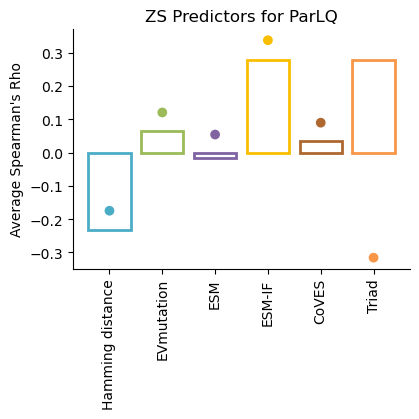

/tmp/ipykernel_3116829/2846746394.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")


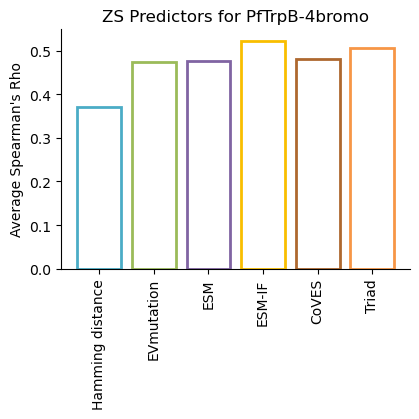

/tmp/ipykernel_3116829/2846746394.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")


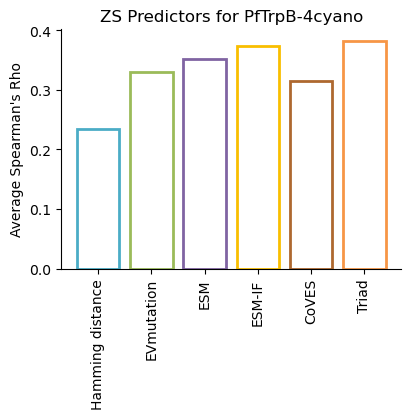

/tmp/ipykernel_3116829/2846746394.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")


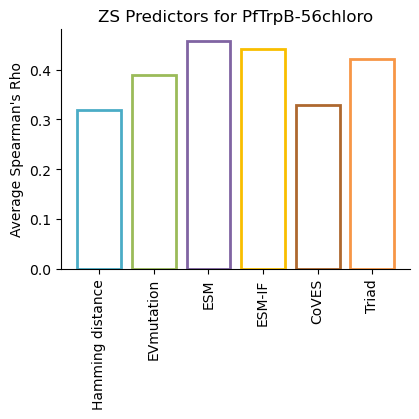

/tmp/ipykernel_3116829/2846746394.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")


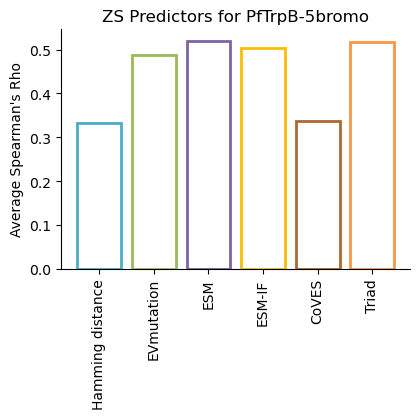

/tmp/ipykernel_3116829/2846746394.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")


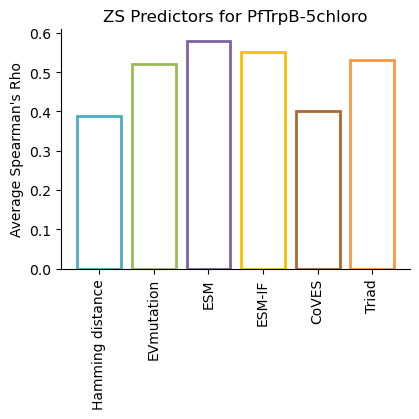

/tmp/ipykernel_3116829/2846746394.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")


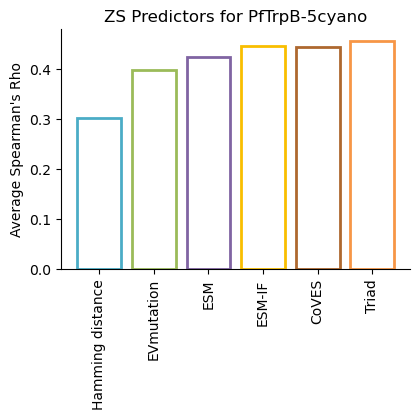

/tmp/ipykernel_3116829/2846746394.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")


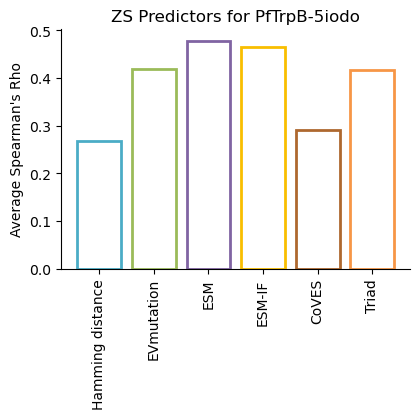

/tmp/ipykernel_3116829/2846746394.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")


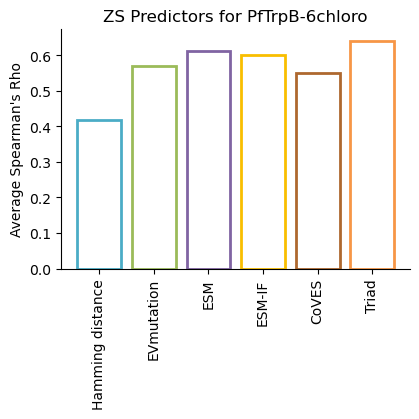

/tmp/ipykernel_3116829/2846746394.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")


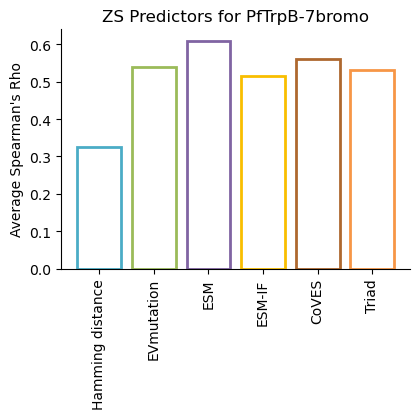

/tmp/ipykernel_3116829/2846746394.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")


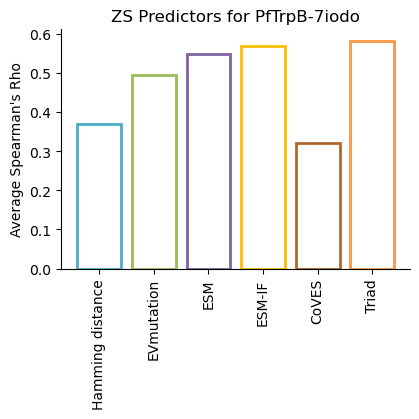

/tmp/ipykernel_3116829/2846746394.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")


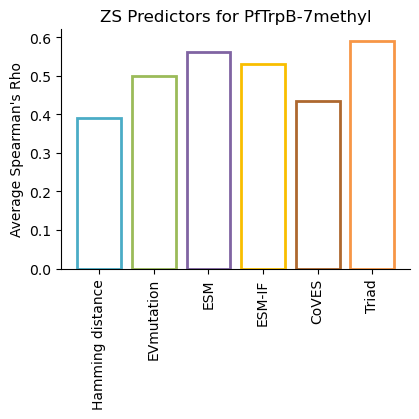

/tmp/ipykernel_3116829/2846746394.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")


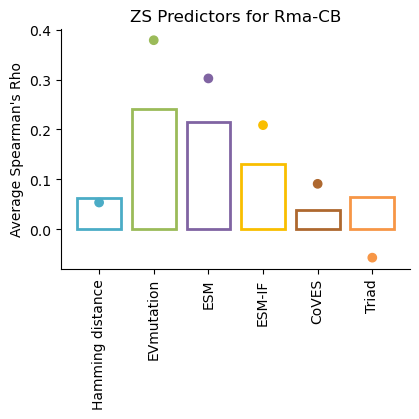

/tmp/ipykernel_3116829/2846746394.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")


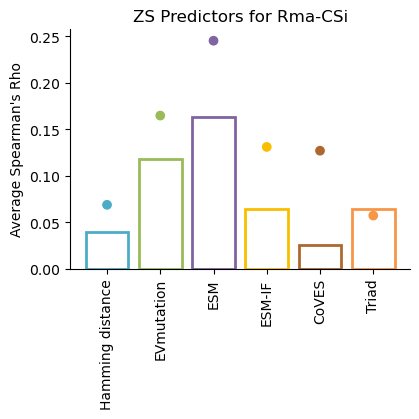

In [26]:
# loop all datasets to get spearmanr between esm_score and fitness
datasets = sorted(glob("/disk2/fli/REVIVAL2/zs/comb/*.csv"))
# get substrate name 
for d in datasets:
    lib = get_file_name(d)
    df = pd.read_csv(d)

    # Plotting
    # Create a new figure and axis
    fig, ax = plt.subplots(figsize=(4, 4))

    # Perform t-tests between each pair of ZS predictors within the metric
    
    rho_values = []
    p_values = []

    selectivity_rho_values = []
    selectivity_p_values = []

    for i, zs in enumerate(ZS_OPTS):
        
        factor = 1
        
        if "Triad" in zs:
            factor = -1
        
        rho, p = spearmanr(df["fitness"], factor*df[zs])
        rho_values.append(rho)
        p_values.append(p)

        if "selectivity" in df.columns:
            selectivity_rho, selectivity_p = spearmanr(df["selectivity"], df[zs])
            selectivity_rho_values.append(selectivity_rho)
            selectivity_p_values.append(selectivity_p)

    bars = ax.bar(
        ZS_OPTS,
        rho_values,
        # yerr=slice_merge_df.loc["std"].to_list(),
        capsize=4,
        edgecolor=[
            FZL_PALETTES[c]
            for c in ["blue", "green", "purple", "yellow", "brown", "orange"]
        ],
        linewidth=2,
        facecolor='none',
        width=0.8,
        error_kw={'ecolor': 'gray', 'capthick': 1} 
        
    )
    # make the font size smaller

    # Annotating p-values
    # for i, p_value in enumerate(p_values):
    #     if p_value < 0.05:
    #         ax.text(i, max(rho_values) * 1.05, "*", ha="center", color="gray")

    # overlay dots for selectivity
    if "selectivity" in df.columns:
        ax.scatter(
            range(len(ZS_OPTS)),
            selectivity_rho_values,
            color=[
                FZL_PALETTES[c]
                for c in ["blue", "green", "purple", "yellow", "brown", "orange"]
            ],
            zorder=10,
        )

    # annotating the p-values for selectivity
    # for i, p_value in enumerate(selectivity_p_values):
    #     if p_value < 0.05:
    #         ax.text(i, max(selectivity_rho_values) * 1.05, "x", ha="center", color="gray")
    

    # Set the title and labels
    ax.set_title("ZS Predictors for " + lib)
    ax.set_xticklabels(ZS_OPT_MAP.values(), rotation=90, ha="center")
    ax.set_ylabel("Average Spearman's Rho")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)  # Disable the y-axis grid lines

    plt.tight_layout(pad=.0, h_pad=-.0, w_pad=1.0)
    plt.show()
    plt.close(fig)
    